# Data ETL

Data ETL routine for wind turbines specification from SIGEL/ANEEL database.

## Imports

In [1]:
from datetime import datetime
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from cdv_analytics.fetch_data import fetch_data

## Fetch data from SIGEL and save to multiple geojson files.
There are 23504 entries in total in Sigel database. Since the website returns at most 1000 entries per request, the result of each request is saved in a json file, so we don't need to make requests for each analysis.

In [ ]:
fetch_data()

### Read the json files and merge them in a single geo dataframe

In [ ]:
sigel_data_path = Path.cwd().parent / "outputs" / "sigel"
sigel_data_path.mkdir(parents=True, exist_ok=True)
processed_data_path = Path.cwd().parent / "outputs" / "processed_gdf.csv"
processed_data_path.parent.mkdir(parents=True, exist_ok=True)

gdf_list = [
    gpd.GeoDataFrame.from_file(filename) for filename in sigel_data_path.iterdir() if filename.is_file()
]
gdf_wind = pd.concat(gdf_list, ignore_index=True)

In [4]:
gdf_wind.head()

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,VERSAO,DATUM_EMP,OPERACAO,FUSO_AG,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,geometry
0,1.85,121.25,80.0,82.5,1666625847000,30739,Caititu,CAI-083,754125.00,8398879.00,Versão Válida,WGS84,Sim,UTM 23 S (MER -45),Central Eólica Caititu S.A.,None,1,BA,EOLCVBA030739-4-01,POINT (-42.64249 -14.47097)
1,2.00,145.00,95.0,100.0,1666625847000,30512,Dreen Boa Vista,BV07,175728.00,9433802.00,Versão Válida,SIRGAS2000,Sim,UTM 25 S (MER -33),GE Boa Vista S.A.,None,2,RN,EOLCVRN030512-0-01,POINT (-35.92447 -5.11575)
2,2.00,145.00,95.0,100.0,1666625847000,30497,Renascença V,15,184692.00,9417056.00,Versão Válida,SIRGAS2000,Sim,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,None,3,RN,EOLCVRN030497-2-01,POINT (-35.84437 -5.26742)
3,2.70,150.00,89.0,122.0,1666625847000,30864,SM,1,176028.00,9397684.00,Versão Válida,SIRGAS2000,Sim,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,None,4,RN,EOLCVRN030864-1-01,POINT (-35.92329 -5.44208)
4,2.10,143.70,96.2,95.0,1666625847000,30295,Colônia,AEG-08,513347.87,9608681.26,Versão Válida,SIRGAS2000,Sim,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,None,5,CE,EOLCVCE030295-3-01,POINT (-38.87983 -3.54033)


# Data Processing

Quick check to ensure all entries has a valid geometry

In [5]:
gdf_wind.geometry.is_valid.unique()

array([ True])

## Latitude and Longitude

In [6]:
gdf_wind["LONG"] = gdf_wind.geometry.x
gdf_wind["LAT"] = gdf_wind.geometry.y
gdf_wind.head()

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,...,OPERACAO,FUSO_AG,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,geometry,LONG,LAT
0,1.85,121.25,80.0,82.5,1666625847000,30739,Caititu,CAI-083,754125.00,8398879.00,...,Sim,UTM 23 S (MER -45),Central Eólica Caititu S.A.,None,1,BA,EOLCVBA030739-4-01,POINT (-42.64249 -14.47097),-42.642495,-14.470968
1,2.00,145.00,95.0,100.0,1666625847000,30512,Dreen Boa Vista,BV07,175728.00,9433802.00,...,Sim,UTM 25 S (MER -33),GE Boa Vista S.A.,None,2,RN,EOLCVRN030512-0-01,POINT (-35.92447 -5.11575),-35.924469,-5.115754
2,2.00,145.00,95.0,100.0,1666625847000,30497,Renascença V,15,184692.00,9417056.00,...,Sim,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,None,3,RN,EOLCVRN030497-2-01,POINT (-35.84437 -5.26742),-35.844373,-5.267424
3,2.70,150.00,89.0,122.0,1666625847000,30864,SM,1,176028.00,9397684.00,...,Sim,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,None,4,RN,EOLCVRN030864-1-01,POINT (-35.92329 -5.44208),-35.923294,-5.442082
4,2.10,143.70,96.2,95.0,1666625847000,30295,Colônia,AEG-08,513347.87,9608681.26,...,Sim,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,None,5,CE,EOLCVCE030295-3-01,POINT (-38.87983 -3.54033),-38.879826,-3.540330


## Column OPERACAO

Verifying values in the column

In [8]:
print( f"Amount of invalid values in Operacao {len(gdf_wind[~gdf_wind["OPERACAO"].isin(['Sim', 'Não'])])}")
print(f"All valuesin column Operacao {gdf_wind["OPERACAO"].unique()}")

Amount of invalid values in Operacao 13
All valuesin column Operacao ['Sim' 'Não' None '1']


In [9]:
gdf_wind["OPERACAO"].isna().sum()

np.int64(5)

There are 13 entries with an invalid value, 8 rows with operation "1" and 5 rows with None. Even though 1 could mean Sim, since it represent a very low percentage of the data, these 13 entries can be ignored for this analysis.

In [10]:
gdf_wind = gdf_wind[gdf_wind["OPERACAO"].isin(["Sim", "Não"])]
gdf_wind["OPERACAO"] = gdf_wind["OPERACAO"] == "Sim"
len(gdf_wind)

23491

## Columns Versao and Origem

In [11]:
gdf_wind["VERSAO"].unique()

array(['Versão Válida'], dtype=object)

In [12]:
gdf_wind["ORIGEM"].unique()

array([None], dtype=object)

## Column POT_MW

Typical values for power output may vary from 1 MW up to 15 MW, so in this step, we can perform a brief outliers check

<Axes: >

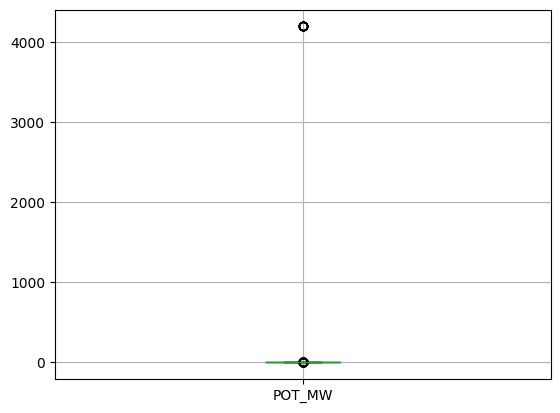

In [13]:
gdf_wind.boxplot(["POT_MW"])

Filtering out absurd values (Power greater than 1.000 MW)

In [14]:
print(f"Removing {len(gdf_wind[gdf_wind['POT_MW'] > 1000])} entries")

gdf_wind = gdf_wind[gdf_wind["POT_MW"] < 1000]
print(f"Remaining entries: {len(gdf_wind)}")

Removing 12 entries
Remaining entries: 23479


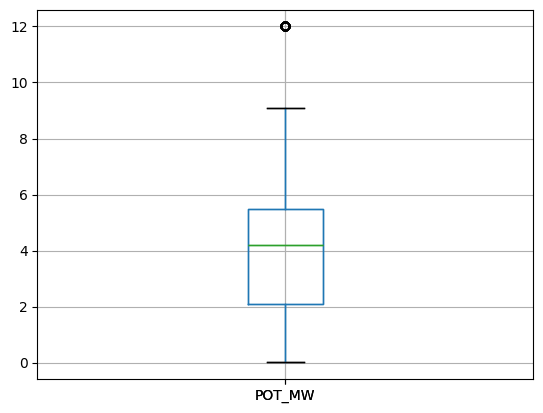

In [16]:
gdf_wind.boxplot(["POT_MW"])
plt.show()


From the remaining data, we can find only 60 entries with power output greater than 10, being completely out of the typical range for the other wind turbines in the country. Therefore, we're removing these entries, since they also correspond to a single operator and it's not in operation.

In [17]:
gdf_g_10 = gdf_wind[gdf_wind["POT_MW"] > 10]
print(f"Operator: {gdf_g_10['NOME_EOL'].unique()}")
print(f"In operation {gdf_g_10['OPERACAO'].unique()}")
print(f"Number of entries {len(gdf_g_10)}")

gdf_wind = gdf_wind[gdf_wind["POT_MW"] < 10]
print(f"Remaining entries: {len(gdf_wind)}")

Operator: ['Marítimo Asa Branca I']
In operation [False]
Number of entries 60
Remaining entries: 23419


## Columns Alt_Torre, Alt_total and Diam_Rotor
By the following boxplot, we can conclude that there are no notable outliers.

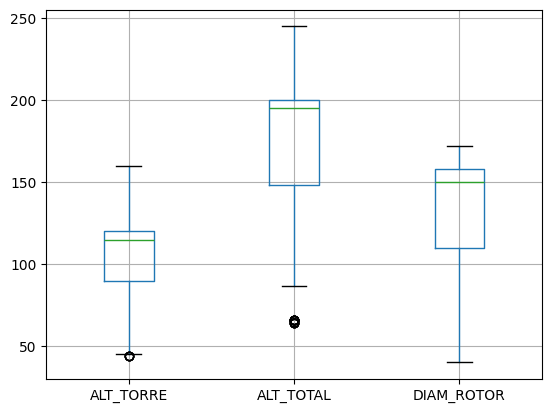

In [20]:
gdf_wind.boxplot(["ALT_TORRE", "ALT_TOTAL", "DIAM_ROTOR"])
plt.show()

## Quick check on the date values

In [21]:
print(f"Ammount of None values for the date: {gdf_wind['DATA_ATUALIZACAO'].isna().sum()}")
print(f"Earliest date on record: {datetime.fromtimestamp(gdf_wind['DATA_ATUALIZACAO'].min()/1000)}")
print(f"Latest date on record: {datetime.fromtimestamp(gdf_wind['DATA_ATUALIZACAO'].max()/1000)}")

Ammount of None values for the date: 0
Earliest date on record: 2020-12-28 18:45:03
Latest date on record: 2024-03-11 16:21:31


Convert date values from epoch time to datetime format

In [22]:
gdf_wind["DATA_ATUALIZACAO"] = pd.to_datetime(gdf_wind["DATA_ATUALIZACAO"], unit="ms")
gdf_wind.head()

,POT_MW,ALT_TOTAL,ALT_TORRE,DIAM_ROTOR,DATA_ATUALIZACAO,EOL_VERSAO_ID,NOME_EOL,DEN_AEG,X,Y,...,OPERACAO,FUSO_AG,PROPRIETARIO,ORIGEM,OBJECTID,UF,CEG,geometry,LONG,LAT
0,1.85,121.25,80.0,82.5,2022-10-24 15:37:27,30739,Caititu,CAI-083,754125.00,8398879.00,...,True,UTM 23 S (MER -45),Central Eólica Caititu S.A.,None,1,BA,EOLCVBA030739-4-01,POINT (-42.64249 -14.47097),-42.642495,-14.470968
1,2.00,145.00,95.0,100.0,2022-10-24 15:37:27,30512,Dreen Boa Vista,BV07,175728.00,9433802.00,...,True,UTM 25 S (MER -33),GE Boa Vista S.A.,None,2,RN,EOLCVRN030512-0-01,POINT (-35.92447 -5.11575),-35.924469,-5.115754
2,2.00,145.00,95.0,100.0,2022-10-24 15:37:27,30497,Renascença V,15,184692.00,9417056.00,...,True,UTM 25 S (MER -33),Renascença V Energias Renováveis S.A.,None,3,RN,EOLCVRN030497-2-01,POINT (-35.84437 -5.26742),-35.844373,-5.267424
3,2.70,150.00,89.0,122.0,2022-10-24 15:37:27,30864,SM,1,176028.00,9397684.00,...,True,UTM 25 S (MER -33),Santa Maria Energias Renováveis S.A.,None,4,RN,EOLCVRN030864-1-01,POINT (-35.92329 -5.44208),-35.923294,-5.442082
4,2.10,143.70,96.2,95.0,2022-10-24 15:37:27,30295,Colônia,AEG-08,513347.87,9608681.26,...,True,UTM 24 S (MER -39),Central Geradora Eólica Colônia S.A.,None,5,CE,EOLCVCE030295-3-01,POINT (-38.87983 -3.54033),-38.879826,-3.540330


## Export data

Export final dataframe to a csv file for data visualization and analyses.

In [ ]:
gdf_wind.to_csv(processed_data_path, index=False)